* 마이캠퍼스 한대희 , daehee@mycampus.io, 010-2101-0255
* 데이터분석/인공지능을 위한 딥러닝 스쿨 --> http://bit.ly/2TXlJJ4

In [0]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [0]:
X = iris.data
Y = iris.target
print(X.shape)
print(Y.shape)
print(Y[:5])


(150, 4)
(150,)
[0 0 0 0 0]


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

def linear_reg(X, Y, name=''):

  X = X.reshape((-1, 1))
  model = LinearRegression()
  model.fit(X, Y)
  print('Model Parameters:', model.coef_, model.intercept_)
  Y2 = model.predict(X)
  rmse_v = rmse(Y, Y2)
  #print("Mean squared error: %.2f" % mean_squared_error(Y, Y2))
  #print('Variance score: %.2f' % r2_score(Y, Y2))
  print("RMSE of %s: %.2f" % (name, rmse_v))

## X의 각 컬럼과 Y간의 regression

In [0]:
linear_reg(X[:, 0], Y, '0')
linear_reg(X[:, 1], Y, '1')
linear_reg(X[:, 2], Y, '2')
linear_reg(X[:, 3], Y, '3')

Model Parameters: [0.77421249] -3.5239816642469144
RMSE of 0: 0.51
Model Parameters: [-0.80192367] 3.4517479816487833
RMSE of 1: 0.74
Model Parameters: [0.44042389] -0.6551129875729391
RMSE of 2: 0.26
Model Parameters: [1.02807056] -0.23299929382718787
RMSE of 3: 0.24


## X의 각 컬럼과 Y간의 상관계수 구하기


In [0]:

print(np.corrcoef(X[:,0], Y))
print(np.corrcoef(X[:,1], Y))
print(np.corrcoef(X[:,2], Y))
print(np.corrcoef(X[:,3], Y))

[[1.         0.78256123]
 [0.78256123 1.        ]]
[[ 1.         -0.42665756]
 [-0.42665756  1.        ]]
[[1.        0.9490347]
 [0.9490347 1.       ]]
[[1.         0.95654733]
 [0.95654733 1.        ]]


## pandas로  corr 구하기

In [20]:

import pandas as pd
df = pd.DataFrame(np.c_[iris.data, iris.target])
print(df.corr())

          0         1         2         3         4
0  1.000000 -0.117570  0.871754  0.817941  0.782561
1 -0.117570  1.000000 -0.428440 -0.366126 -0.426658
2  0.871754 -0.428440  1.000000  0.962865  0.949035
3  0.817941 -0.366126  0.962865  1.000000  0.956547
4  0.782561 -0.426658  0.949035  0.956547  1.000000


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def draw_iris_scatter(X, Y, name=''):
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

  plt.figure(2, figsize=(8, 6))
  plt.clf()

  # Plot the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
              edgecolor='k')
  plt.xlabel('%s length' % name)
  plt.ylabel('%s width' % name)

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()

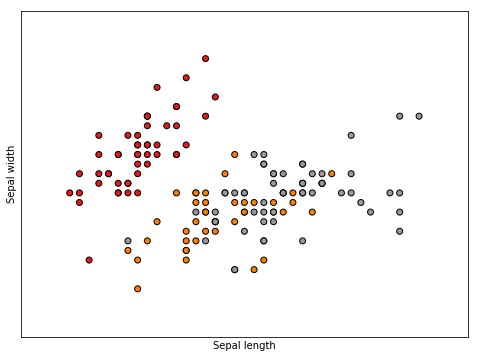

In [0]:
draw_iris_scatter(X[:, :2], Y, name='Sepal')

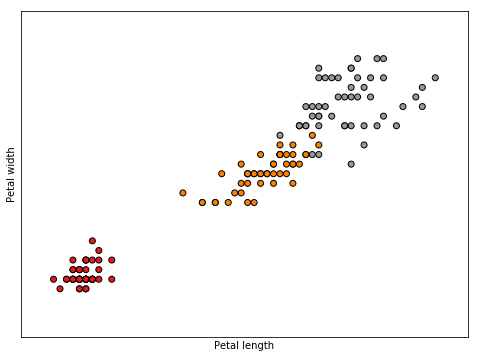

In [0]:
draw_iris_scatter(X[:, 2:4], Y, name='Petal')

Column들 사이의 관계(correlation)

          0         1         2         3         4
0  1.000000 -0.117570  0.871754  0.817941  0.782561
1 -0.117570  1.000000 -0.428440 -0.366126 -0.426658
2  0.871754 -0.428440  1.000000  0.962865  0.949035
3  0.817941 -0.366126  0.962865  1.000000  0.956547
4  0.782561 -0.426658  0.949035  0.956547  1.000000


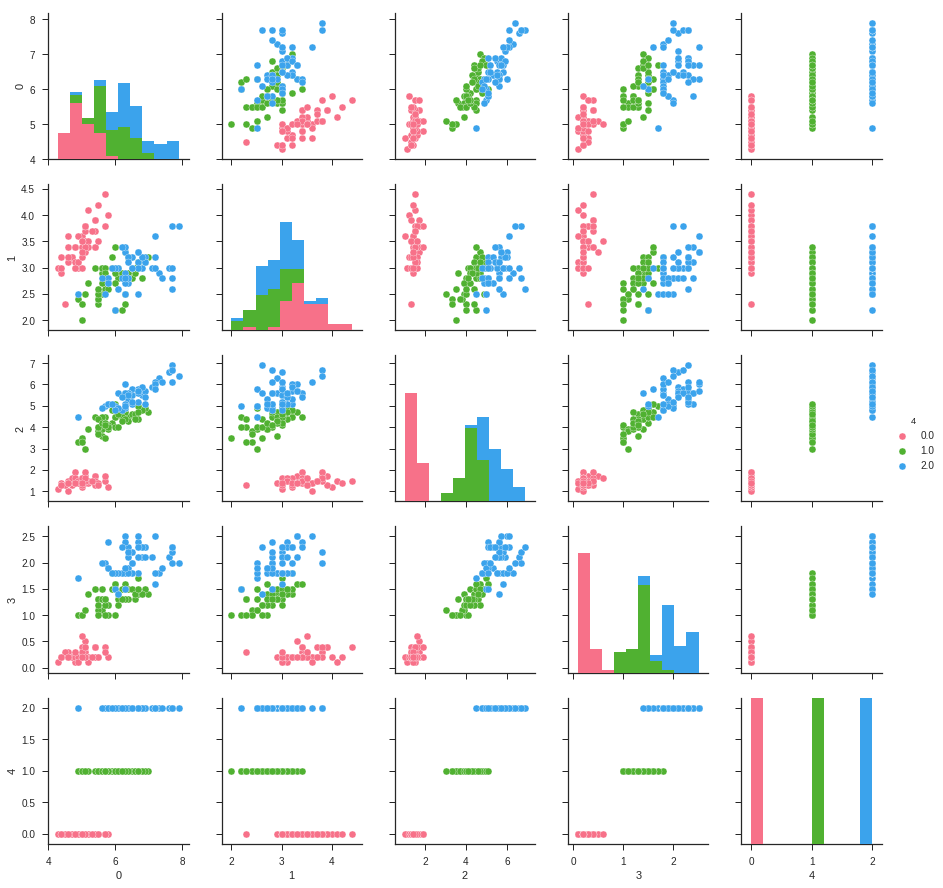

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

sns.pairplot(df, hue=4, palette="husl")
plt.show()

In [0]:
for column in range(4):
  corr = np.corrcoef(X[:, column], Y)
  print(corr[0,1])

0.782561231810082
-0.4266575607811244
0.9490346990083889
0.9565473328764034
